# Jeu de dés

## Présentation de l'activité
- **Niveau de classe :**
 - Classe de seconde générale et technologique
- **Références au programme :** 
 - Seconde : *Lire et comprendre une fonction Python renvoyant le nombre ou la fréquence de succès dans un échantillon de taille 𝑛 pour une expérience aléatoire à deux issues*.
 - Seconde : *Observer la loi des grands nombres à l’aide d’une simulation sur Python*.
 - Seconde : *Simuler $N$ échantillons de taille $n$ d’une expérience aléatoire à deux issues. Si $p$ est la probabilité d’une issue et $f$ sa fréquence observée dans un échantillon, calculer la proportion des cas où l’écart entre $p$ et $f$ est inférieur ou égal à $\frac{1}{\sqrt{n}}$*.
- **Description de l'activité :** cette activité propose un jeu de dés qui débouche sur deux issues (gagner ou perdre). Dans un premier temps, on écrit un programme permettant de dénombrer tous les cas (favorables et possibles) et d'en déduire la probabilité $p$ de gagner au cours du jeu. Cela sensibilise les élèves à l'intérêt de la programmation lorsqu'en l'absence de raisonnement combinatoire, on est obligé de dénombrer tous les cas. Dans un deuxième temps, on simule des échantillons de différentes tailles de manière à visualiser la stabilisation des fréquences lorsque la taille des échantillons croît. Dans un troisième temps, on simule $N$ échantillons de même taille $n$ et on calcule la proportion des cas où l'écart entre la probabilité $p$ et la fréquence de succès dans l'échantillon est inférieure à $\frac{1}{\sqrt{n}}$.




## Situation
Le jour de la Fête de la science, des étudiants organisent un jeu : le joueur lance 3 dés cubiques (un rouge, un vert, un bleu) bien équilibrés dont les faces sont numérotées de $1$ à $6$. S’il arrive à construire un triangle (non aplati) dont les côtés ont pour mesure les valeurs des faces obtenues, il gagne, sinon il perd.


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Mathématiques débranchées** :

Un débat peut être amené sur la possibilité de construire un triangle dont les côtés ont des mesures données.
On peut aussi discuter des cas limites (cas d'égalité). 

## Programmation d'une partie

La fonction suivante prend en paramètres trois nombres entiers correspondant aux valeurs des faces des trois dés et renvoie $1$ si la partie est gagnée et $0$ sinon.

In [1]:
def partie(d1, d2, d3) : 
    sommeDesTroisCotes = d1 + d2 + d3
    grand = max(d1, d2, d3)
    sommeDesDeuxAutresCotes = sommeDesTroisCotes - grand
    if grand < sommeDesDeuxAutresCotes: 
        return 1
    else : 
        return 0 
  
# Tests 
print(partie(2,3,4))
print(partie(1,2,3))
print(partie(1,1,4))

1
0
0


<div class="alert alert-info">

Suggestions pédagogiques
</div>

 **Compléter un programme**

  Le programme précédent étant fourni en remplaçant les lignes 2, 3, 4 et 5 par `sommeDesTroisCotes = ...`, `grand = ...`, `sommeDesDeuxAutresCotes = ...`et `if ...`, demander aux élèves de compléter les lignes 2, 3, 4 et 5. 

                                

<div class="alert alert-success">
<details>
    <summary>Réponse</summary>
    
    `if 2*grand < d1 + d2 + d3` 
    
</details>
</div>    
 


## Calcul de la probabilité de gagner
À l'aide de boucles imbriquées, on calcule le nombre de toutes les issues possibles (total) lors du jeu et le nombre de celles qui permettent de gagner (favorable). Le quotient favorable/total donne alors la probabilité de gagner lors d'une partie.

In [2]:
favorable, total = 0, 0
for d1 in range(1,7) : 
    for d2 in range(1,7) : 
        for d3 in range(1,7) : 
            if partie(d1, d2, d3) == 1: 
                favorable = favorable + 1
            total = total + 1
print(favorable, total)
print(favorable/total)

111 216
0.5138888888888888


*On en déduit la probabilité $p=\dfrac{111}{216}\approx 0,51$*.

<div class="alert alert-info">

Suggestions pédagogiques

</div>

- **Écrire un programme**

    Écrire un programme qui permet de calculer le nombre exact de cas favorables et le nombre de cas possibles.
- **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 5, 6 et 7. par `if ...`, `favorable = ...` et `total = ...`, demander aux élèves de compléter les lignes 5, 6 et 7.  

## Calcul de la fréquence des parties gagnées dans un échantillon simulé
On calcule la fréquence des parties gagnées sur un échantillon de $n$ parties simulées.
La fonction `echantillon` prend en paramètre l'entier $n$ (taille de l'échantillon) et renvoie la proportion de parties gagnées sur cet échantillon.

In [11]:
from random import randint
def echantillon(n) : 
    gagne = 0
    for i in range(n) :
        d1 =  randint(1,6)
        d2 =  randint(1,6)
        d3 =  randint(1,6)
        gagne = gagne + partie(d1, d2, d3) # On peut préférer pédagogiquement un if
    return gagne / n

print(echantillon(10))
print(echantillon(100))
print(echantillon(1000))
print(echantillon(1000))

0.6
0.55
0.525
0.521


<div class="alert alert-info">

Suggestions pédagogiques

</div>

- **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 5 à 8 par `d1 = ...`, `d2 = ...`, `d3 = ...` et `gagne = ...`, demander aux élèves de compléter les lignes 5 à 8 dans manière à simuler `n` parties et à compter dans la variable `gagne` le nombre de parties gagnées (en utilisant la fonction `partie`).
- **Expliquer un programme**

    Expliquer la ligne 8. 


## Fluctuation de la fréquence des parties gagnées dans plusieurs échantillons simulés

Le programme suivant affiche des listes contenant les proportions (ou fréquences) de parties gagnées  pour 10 échantillons de taille 10, puis 10 échantillons de taille 100 et enfin 10 échantillons de taille 1000.

In [4]:
print([echantillon(10) for i in range(10)])
print([echantillon(100) for i in range(10)])
print([echantillon(1000) for i in range(10)])

[0.5, 0.4, 0.3, 0.6, 0.5, 0.9, 0.6, 0.6, 0.7, 0.5]
[0.55, 0.46, 0.46, 0.46, 0.44, 0.59, 0.49, 0.53, 0.55, 0.51]
[0.505, 0.533, 0.52, 0.501, 0.512, 0.504, 0.509, 0.505, 0.524, 0.53]


<div class="alert alert-info">

Suggestions pédagogiques

</div>

- **Observer**

    Que constate-t-on dans les listes précédentes ?


La fonction ci-dessous permet de réaliser $N=100$ simulations différentes d'échantillons de $n=1000$ parties. 

On a représenté par des points les fréquences obtenues : 
- en vert les fréquences qui sont dans l'intervalle $[ p-\frac{1}{\sqrt n} ; p+\frac{1}{\sqrt n} ]$, 
- en rouge celles qui ne le sont pas. 

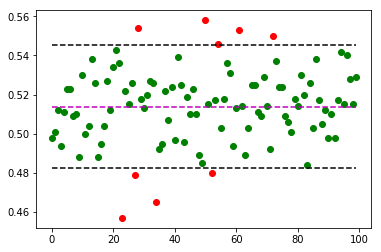

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import sqrt
n, p = 1000, 111/216
N = 100
mini, maxi = p-1/sqrt(n), p+1/sqrt(n)
for repet in range(N) : 
    f = echantillon(n)
    if mini < f < maxi : 
        plt.plot(repet, f, "go")
    else : 
        plt.plot(repet, f, "ro")
plt.plot([0,repet],[p, p], "m--")
plt.plot([0,repet],[mini, mini], "k--")
plt.plot([0,repet],[maxi, maxi], "k--")
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques

</div>

- **Tester** le programme pour différentes valeurs de $n$.
- **Compléter** le programme précédent pour calculer le nombre de cas où l'écart entre la fréquence de gagner au cours de $n$ parties et la probabilité $p$ est inférieur ou égal à $\frac{1}{\sqrt{n}}$ (on prendra toujours $N=100$ échantillons).
- **Écrire** une fonction qui prend en argument le nombre $n$ de parties et qui renvoie le nombre de cas où l'écart entre la fréquence de gagner au cours des $n$ parties et la probabilité $p$ est inférieur ou égal à $\frac{1}{\sqrt{n}}$. Le nombre d'échantillons est fixé, par exemple à $N=100$.
